In [206]:
%load_ext autoreload
%autoreload 2
from util import *
from ArcExpression import get_Arc_expression, normalize_Arc
from performance_metrics import *

from scipy import stats
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
proj_meta = load_meta()

In [61]:
tmp = eval_performance(proj_meta)

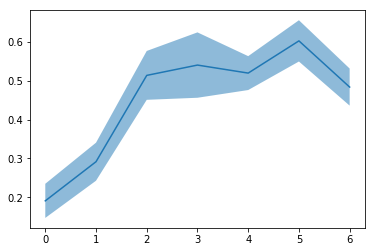

In [63]:
mn = np.nanmean(tmp, axis=0)
Sem = sem(tmp, dim=0)
x = np.arange(len(mn))
plt.fill_between(x, mn-Sem, mn+Sem, alpha=0.5)
plt.plot(x,mn)

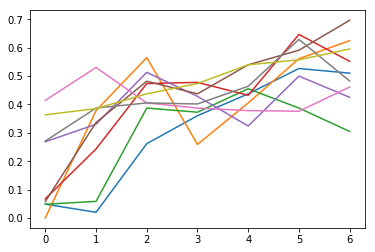

In [56]:
plt.plot(tmp.T);

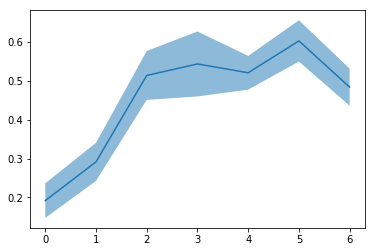

In [45]:
mn = np.nanmean(tmp, axis=0)
Sem = sem(tmp, dim=0)
x = np.arange(len(mn))
plt.fill_between(x, mn-Sem, mn+Sem, alpha=0.5)
plt.plot(x,mn)

In [68]:
# Early activity
act = np.vstack([act2mat(proj_meta, site, 13) for site in range(4,9)])

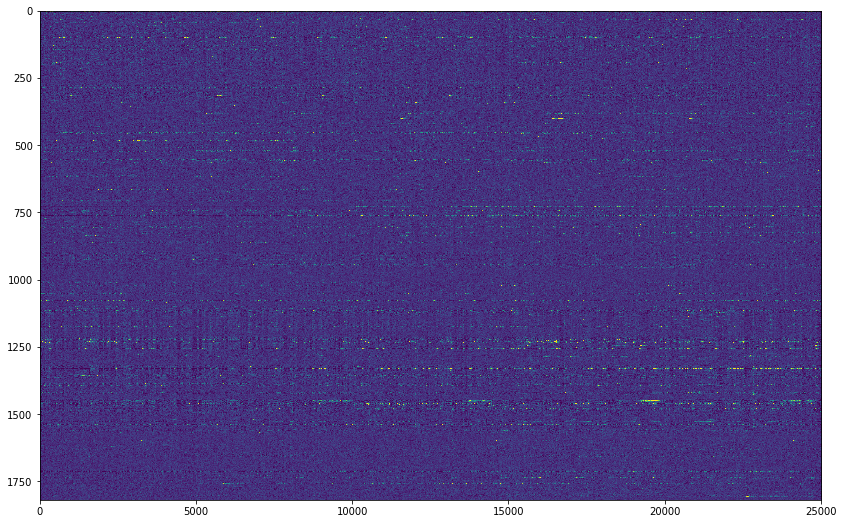

In [69]:
plt.figure(figsize=(14,9))
imagesc(act, clim=[0.9, 1.6])

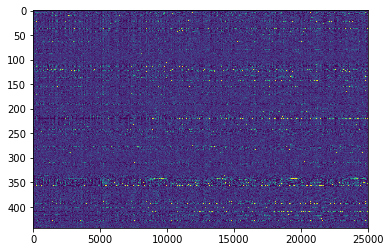

In [89]:
act = act2mat(proj_meta, 7, 13)
imagesc(act, clim=[0.9, 1.6])

In [203]:
L, R = tone_responses(proj_meta, 5, 13, 20, 80)

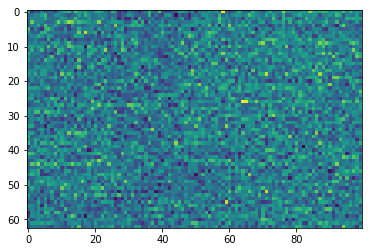

In [204]:
imagesc(L[120,:,:]);

In [205]:
L.shape, R.shape

((394, 63, 100), (394, 53, 100))

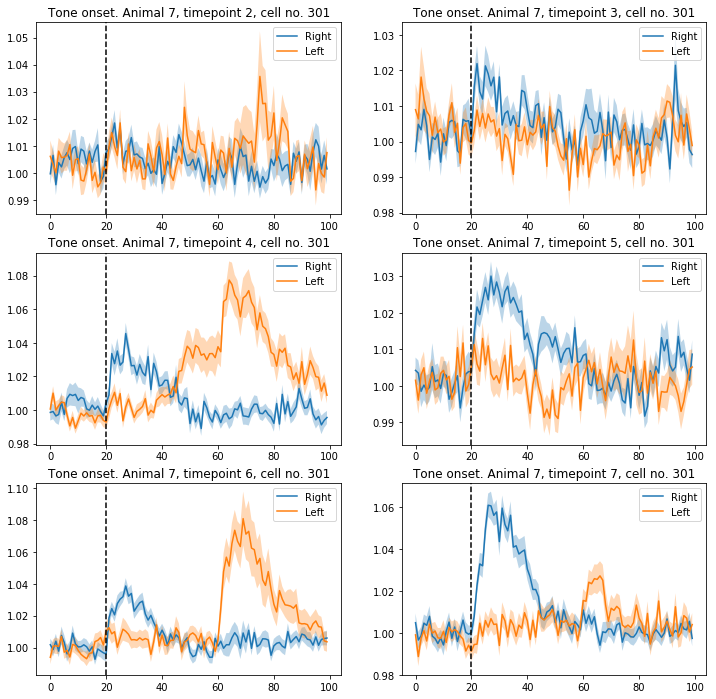

In [278]:
ind = 300
site = 6
cnt = 0
plt.figure(figsize=(12,12))
for tp in [3, 5, 7, 9, 11, 13]:
    plt.subplot(3,2,cnt+1)
    L, R = tone_responses(proj_meta, site, tp, 20, 80)
    cnt += 1
    Sem = sem(R[ind,:,:])
    mn = np.mean(R[ind,:,:], axis=0)
    x = np.arange(len(mn))
    plt.fill_between(x, mn-Sem, mn+Sem, alpha=0.3)
    plt.plot(x, mn, label="Right")

    Sem = sem(L[ind,:,:])
    mn = np.mean(L[ind,:,:], axis=0)
    plt.fill_between(x, mn-Sem, mn+Sem, alpha=0.3)
    plt.plot(x, mn, label="Left")
    plt.legend()
    plt.axvline(20, color="k", linestyle="--")

    plt.title("Tone onset. Animal {}, timepoint {}, cell no. {}"\
              .format(site+1, np.int32((tp+1)/2), ind+1))

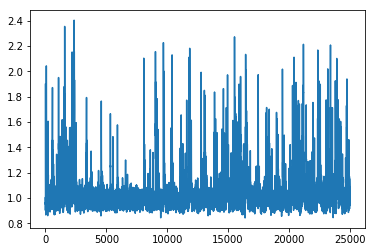

In [230]:
plt.plot(act[120,:])

In [159]:
tmp = act_responses(proj_meta, 7, 13, "GratID", 20, 80)

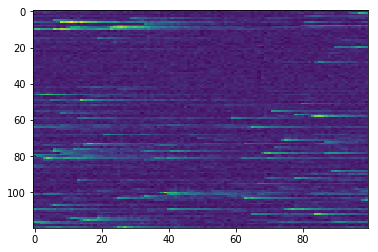

In [164]:
imagesc(tmp[120,:,:])

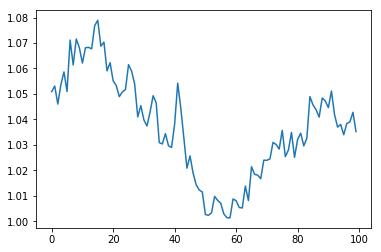

In [167]:
plt.plot(np.mean(tmp[120,:,:], axis=0))

In [3]:
site = 1
tp = 5
rewR = proj_meta[site]['RewardR'][0][tp]
rewL = proj_meta[site]['RewardL'][0][tp]
Tones = proj_meta[site]['ToneID'][0][tp]

In [130]:
toneL_onsets = np.intersect1d(np.where(np.diff(Tones) > 1)[1], 
                              np.where(np.diff(Tones) < 2)[1]) + 1

toneR_onsets = np.where(np.diff(Tones) > 2)[1] + 1

In [131]:
rewL_onsets = np.where(np.diff(rewL) > 1)[1] + 1
rewR_onsets = np.where(np.diff(rewR) > 1)[1] + 1

In [132]:
correctL = []
for ind in range(len(toneL_onsets)):
    toneL_bin = np.arange(toneL_onsets[ind], toneL_onsets[ind]+60)
    left_bin_hits = np.isin(rewL_onsets, toneL_bin)
    if np.size(left_bin_hits) > 0:
        correctL.append(np.max(1*left_bin_hits))

In [133]:
correctR = []
for ind in range(len(toneR_onsets)):
    toneR_bin = np.arange(toneR_onsets[ind], toneR_onsets[ind]+41)
    right_bin_hits = np.isin(rewR_onsets, toneR_bin)
    if np.size(right_bin_hits) > 0:
        correctR.append(np.max(1*right_bin_hits))

In [134]:
1*left_bin_hits

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [135]:
tmp = np.hstack((correctL, correctR))

In [136]:
np.mean(correctL), np.mean(correctR)

(0.8548387096774194, 0.3114754098360656)

In [137]:
len(rewR_onsets)

18

In [144]:
rewR[:,rewR_onsets]

array([[4.72374291, 4.72180939, 4.72374291, 4.72406516, 4.72277615,
        4.72406516, 4.72374291, 4.72277615, 4.71987588, 4.7224539 ,
        4.7230984 , 4.72180939, 4.72470967, 4.72438741, 4.72180939,
        4.72116489, 4.72084264, 4.72180939]])

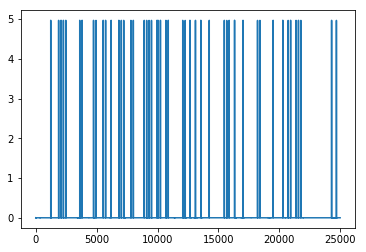

In [152]:
plt.plot(rewL.T);

In [36]:
tmp = np.vstack([proj_meta[site]['RewardR'][k][tp] for k in range(4)])

<IPython.core.display.Javascript object>


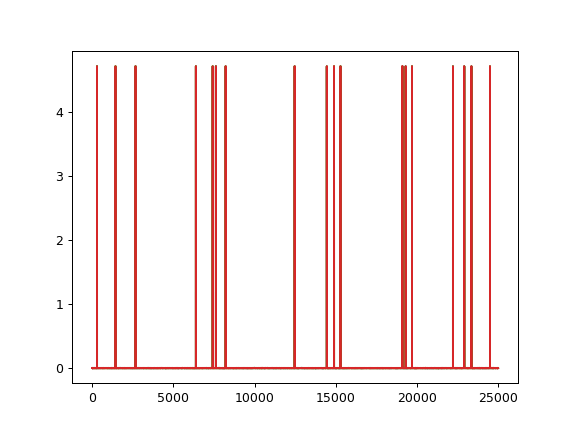

In [9]:
plt.plot(tmp.T)

In [131]:
site = 6
tp = 11
rewR = proj_meta[site]['RewardR'][0][tp]
rewL = proj_meta[site]['RewardL'][0][tp]
Tones = proj_meta[site]['ToneID'][0][tp]
lickR = proj_meta[site]['LickR'][0][tp]
lickL = proj_meta[site]['LickL'][0][tp]

In [132]:
toneL_onsets = np.intersect1d(np.where(np.diff(Tones) > 1)[1], 
                              np.where(np.diff(Tones) < 2)[1]) + 1

toneR_onsets = np.where(np.diff(Tones) > 2)[1] + 1

toneL_onsets = np.delete(toneL_onsets, np.where(np.diff(toneL_onsets) < 40))
toneR_onsets = np.delete(toneR_onsets, np.where(np.diff(toneR_onsets) < 40))

rewL_onsets = np.where(np.diff(rewL) > 1)[1] + 1
rewR_onsets = np.where(np.diff(rewR) > 1)[1] + 1


In [190]:
perf = np.zeros((len(proj_meta), 7))
for site in range(len(proj_meta)):
    cnt = 0
    for tp in np.int32(np.linspace(2,14,7)-1):
        Tones = proj_meta[site]['ToneID'][0][tp]
        lickR = np.abs(proj_meta[site]['LickR'][0][tp])
        lickL = np.abs(proj_meta[site]['LickL'][0][tp])

        toneL_onsets = np.intersect1d(np.where(np.diff(Tones) > 1)[1],
                                  np.where(np.diff(Tones) < 2)[1]) + 1
        toneR_onsets = np.where(np.diff(Tones) > 2)[1] + 1
        toneL_onsets = np.delete(toneL_onsets, np.where(np.diff(toneL_onsets) < 40))
        toneR_onsets = np.delete(toneR_onsets, np.where(np.diff(toneR_onsets) < 40))

        resp1 = []
        for ind in toneL_onsets:
            tmpR = np.where(lickR[:,ind+20:ind+40] > 0.2)[1]
            tmpL = np.where(lickL[:,ind+20:ind+40] > 0.2)[1]

            if tmpR.shape[0] == 0 and tmpL.shape[0] == 0:
                resp1.append(0)
            elif tmpR.shape[0] == 0:
                resp1.append(1)
            elif tmpL.shape[0] == 0:
                resp1.append(2)
            else:
                latR = np.argmax(tmpR)
                latL = np.argmax(tmpL)
                if latL < latR:
                    resp1.append(1)
                else:
                    resp1.append(2)
        resp1 = np.asarray(resp1)

        resp2 = []
        for ind in toneR_onsets:
            tmpR = np.where(lickR[:,ind+20:ind+40] > 0.2)[1]
            tmpL = np.where(lickL[:,ind+20:ind+40] > 0.2)[1]

            if tmpR.shape[0] == 0 and tmpL.shape[0] == 0:
                resp2.append(0)
            elif tmpR.shape[0] == 0:
                resp2.append(1)
            elif tmpL.shape[0] == 0:
                resp2.append(2)
            else:
                latR = np.argmax(tmpR)
                latL = np.argmax(tmpL)
                if latL < latR:
                    resp2.append(1)
                else:
                    resp2.append(2)
        resp2 = np.asarray(resp2)
        cnt += 1
        perf[site, cnt] = np.divide(np.sum(resp1==1)+np.sum(resp2==2),
                                    np.sum(resp1>0)+np.sum(resp2>0))

IndexError: index 7 is out of bounds for axis 1 with size 7

In [260]:
tmp = eval_performance_DM(proj_meta)

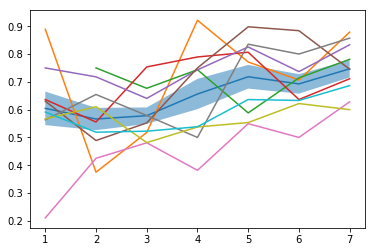

In [261]:
mn = np.nanmean(tmp, axis=0)
Sem = sem(tmp, dim=0)
x = np.arange(len(mn))+1
plt.fill_between(x, mn-Sem, mn+Sem, alpha=0.5)
plt.plot(x,mn)
plt.plot(x, tmp.T)
# plt.ylim((0.4, 0.9))

5

In [214]:
            toneL_onsets = np.delete(toneL_onsets, toneL_onsets > len(lickR)-40)


In [228]:
toneL_onsets > len(lickR)-40

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [238]:
tmp[tmp==1] and tmp[tmp==0] = np.NaN

SyntaxError: can't assign to operator (<ipython-input-238-2d50730f9865>, line 1)

In [235]:
tmp

array([[0.        , 0.2       , 0.53846154, 0.95238095, 0.79104478,
        0.70588235, 0.890625  ],
       [       nan, 0.75806452, 0.69565217, 0.77142857, 0.6031746 ,
        0.71084337, 0.79411765],
       [0.71428571, 0.53846154, 0.76119403, 0.77358491, 0.8       ,
        0.6557377 , 0.72727273],
       [0.9       , 0.77142857, 0.65060241, 0.73239437, 0.84482759,
        0.72897196, 0.83908046],
       [0.65853659, 0.4939759 , 0.56122449, 0.75806452, 0.8974359 ,
        0.87692308, 0.77777778],
       [0.2       , 0.44736842, 0.51041667, 0.40952381, 0.54205607,
        0.58558559, 0.64814815],
       [0.55421687, 0.65346535, 0.57777778, 0.5308642 , 0.86567164,
        0.75925926, 0.88405797],
       [0.61111111, 0.61363636, 0.51456311, 0.5       , 0.53921569,
        0.71875   , 0.55855856],
       [0.60674157, 0.51485149, 0.50961538, 0.53333333, 0.62686567,
        0.59405941, 0.66972477]])